In [1]:
import pandas as pd

In [2]:
#reading the dataset
sales= pd.read_csv("BlackFriday.csv")
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
#finding the null values
sales.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
#number of columns and rows in the dataset
sales.shape

(537577, 12)

## Analyzing the columns

In [6]:
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
sales['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
537572    P00193542
537573    P00111142
537574    P00345942
537575    P00285842
537576    P00118242
Name: Product_ID, Length: 537577, dtype: object

## How many users in the system

In [8]:
sales['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [9]:
sales['User_ID'].nunique()

5891

In [10]:
#So there are 5891 unique users in the system

In [11]:
sales["Product_ID"].nunique()

3623

In [12]:
#we have 3623 unique products in the system

In [13]:
#how many unique genders in the system
sales.Gender.unique()

array(['F', 'M'], dtype=object)

In [14]:
#How many unique ages in the system
sales.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
sales.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
sales.City_Category.unique()
#the cities the users living to analyze who are the people purchasing the blackfriday sales

array(['A', 'C', 'B'], dtype=object)

In [17]:
sales.Stay_In_Current_City_Years.unique()
#the number of years that user stay in that city

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
sales.Marital_Status.unique()
#either the user is married or unmarried

array([0, 1])

In [19]:
sales['Purchase'].mean()
#how much money does people spent in the black friday sales

np.float64(9333.859852635065)

In [20]:
#automating the analzing the columns
for column in sales.columns:
    print(column,"=",sales[column].nunique())

User_ID = 5891
Product_ID = 3623
Gender = 2
Age = 7
Occupation = 21
City_Category = 3
Stay_In_Current_City_Years = 5
Marital_Status = 2
Product_Category_1 = 18
Product_Category_2 = 17
Product_Category_3 = 15
Purchase = 17959


In [21]:
#removing the product category 2 and 3 due to more missing values in the dataset 
del sales['Product_Category_2']
del sales['Product_Category_3']
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

## Analyzing the Gender

In [22]:
#lets see the head of the dataframe
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [23]:
gender = sales.groupby('Gender').Gender.count()
#this is the count of males and females purchasing in the blackfriday sales
#so the males are more than females

<Axes: title={'center': 'Sales by Gender'}, ylabel='Gender'>

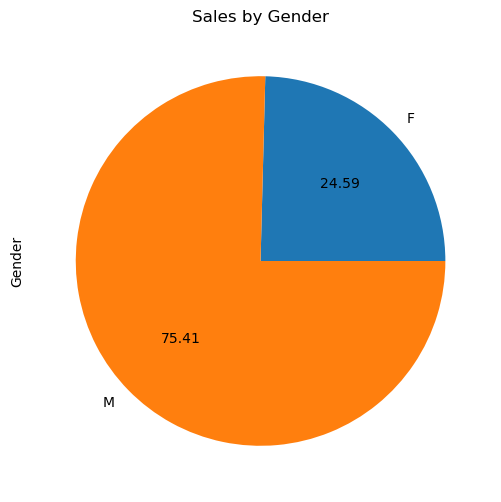

In [24]:
#now we want ot display the data in the barplot
gender.plot.pie(y = 'Gender',figsize=(6,6),autopct= "%.2f",title="Sales by Gender")

<Axes: xlabel='Gender'>

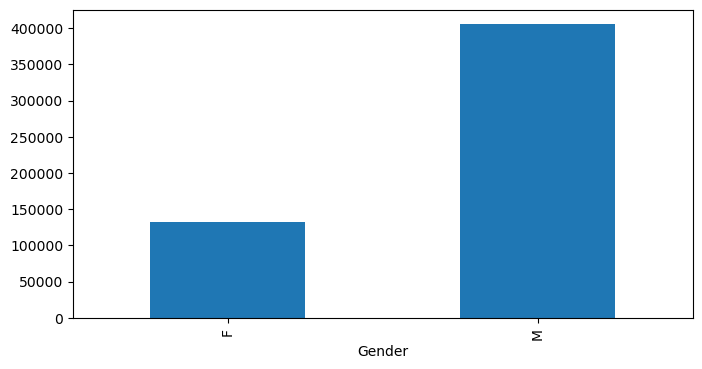

In [25]:
gender.plot(kind = 'bar',figsize=(8,4))

In [26]:
#to specify the amounts spent by different types of gender for male spent amound and female spent amount
gender_purchase = sales.groupby('Gender').Purchase.sum()
gender_purchase

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<Axes: title={'center': 'Purchase Amount by Gender'}, xlabel='Gender'>

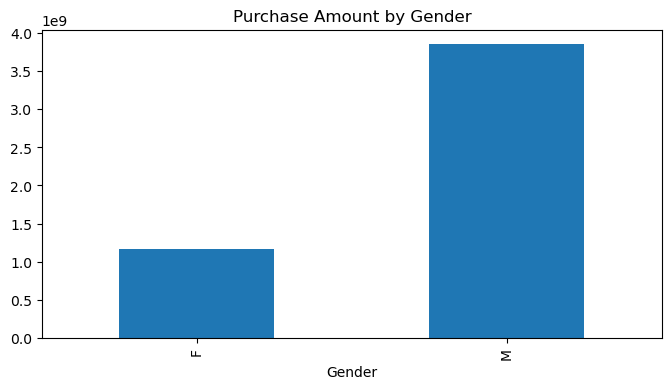

In [27]:
gender_purchase.plot(kind='bar', figsize=(8, 4), title='Purchase Amount by Gender')

<Axes: title={'center': 'Purchase Amount by Gender'}, ylabel='Purchase'>

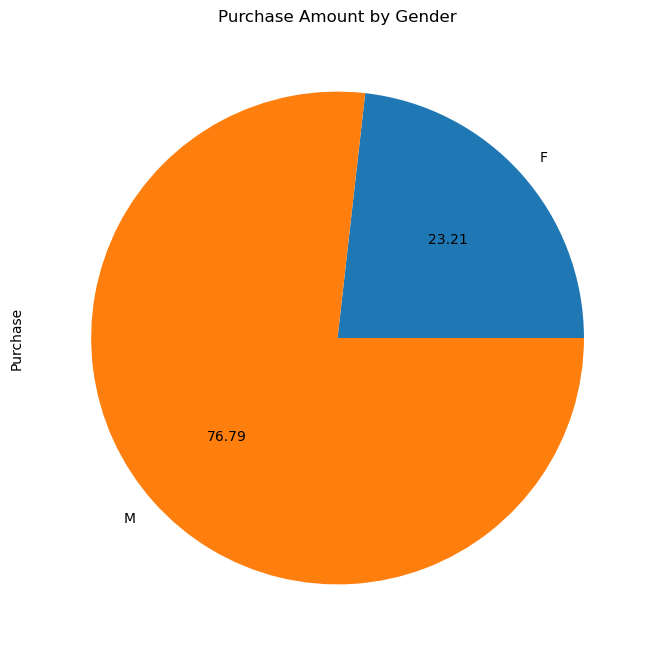

In [28]:
gender_purchase.plot(kind='pie', figsize=(8, 8), title='Purchase Amount by Gender',autopct = "%.2f")

In [29]:
#if i want to knew how much each gender spending we need to use average to know how much each one spending money
gender_mean_purchase = sales.groupby("Gender").Purchase.mean()
gender_mean_purchase

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

<Axes: title={'center': 'Average Spending Per Gender'}, ylabel='Purchase'>

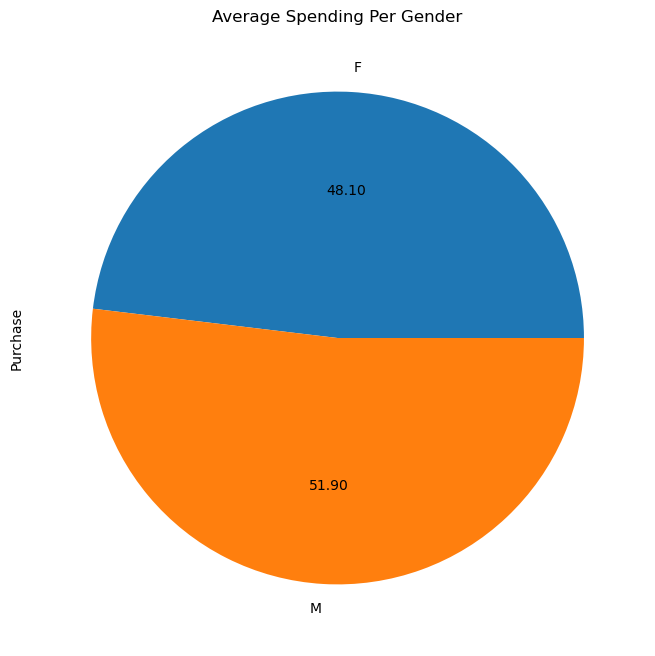

In [30]:
"""so we can also plot the graphs so that understand how 
a normal average male or female spend money"""
gender_mean_purchase.plot(kind = 'pie',figsize = (8,8),title = 'Average Spending Per Gender',autopct = "%.2f")


## Analyzing the Age & Martial Status

In [31]:
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### How many purchases are made by the people from age 0-17,18-## and so on

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

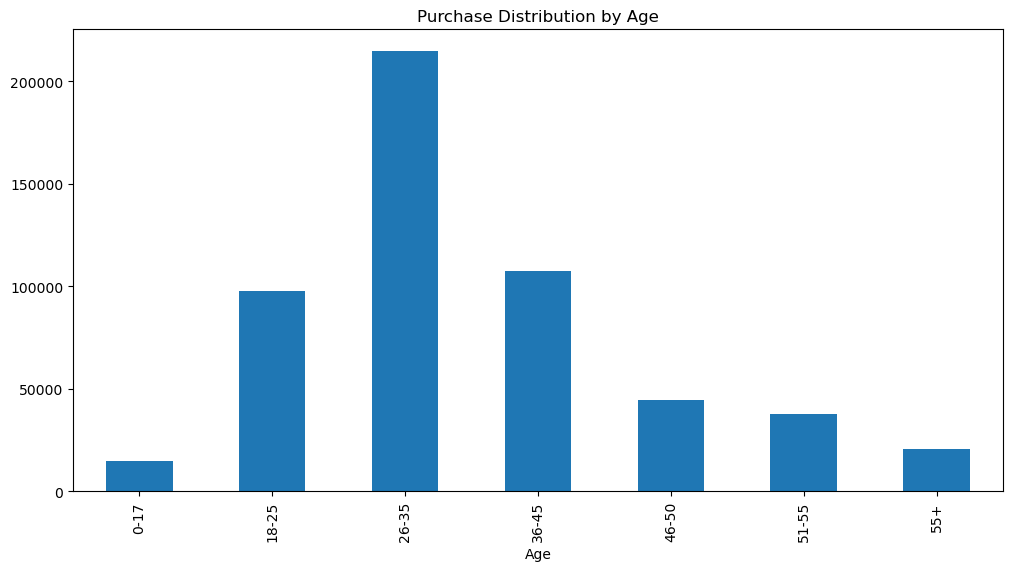

In [32]:
sales.groupby('Age').size().plot(kind = 'bar',title = 'Purchase Distribution by Age',figsize = (12,6))

In [33]:
## so the people from age 18 - 45 are purchasing maximum


### No.of unique products purchased by each age category

In [34]:
uniq_age_purchase = []
for i in sales.Age.unique():
    count = sales[sales['Age'] == i].Product_ID.nunique()
    print(f"The no.of unique products purchased by {i} Age Group is : {count}")
    uniq_age_purchase.append([i,count])
uniq_age_purchase
age_purchase = pd.DataFrame(uniq_age_purchase,columns = ['Age','Products'])
##Created a dataframe that stores this age purchases information

The no.of unique products purchased by 0-17 Age Group is : 2300
The no.of unique products purchased by 55+ Age Group is : 2573
The no.of unique products purchased by 26-35 Age Group is : 3419
The no.of unique products purchased by 46-50 Age Group is : 3099
The no.of unique products purchased by 51-55 Age Group is : 2877
The no.of unique products purchased by 36-45 Age Group is : 3318
The no.of unique products purchased by 18-25 Age Group is : 3213


In [35]:
age_purchase.head(5)

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877


<Axes: xlabel='Age'>

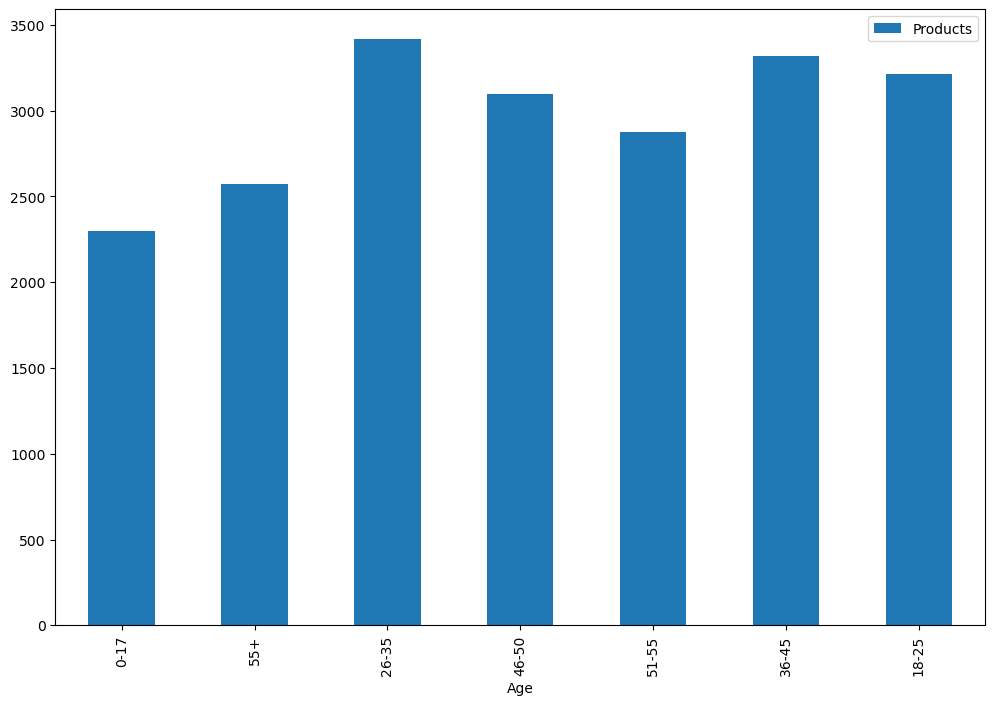

In [36]:
age_purchase.plot(kind = 'bar',x = 'Age',figsize=(12,8))

### How much amount spent by age

<Axes: title={'center': 'Amount Spent by Different Ages'}, xlabel='Age'>

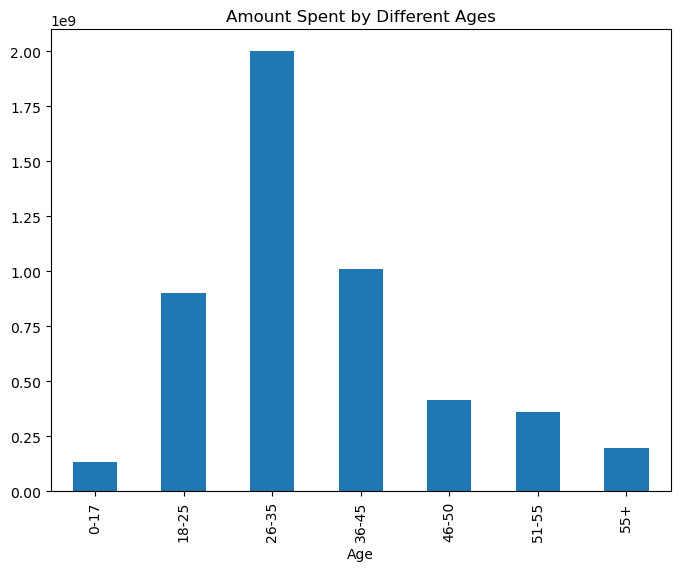

In [37]:
sales.groupby("Age").Purchase.sum().plot(kind= 'bar',figsize=(8,6),x = 'Age',y='Amount Spent by Age',title = "Amount Spent by Different Ages")

### Average money spent by different Ages

#### Bar Chart

<Axes: title={'center': 'Amount Spent by Different Ages'}, xlabel='Age'>

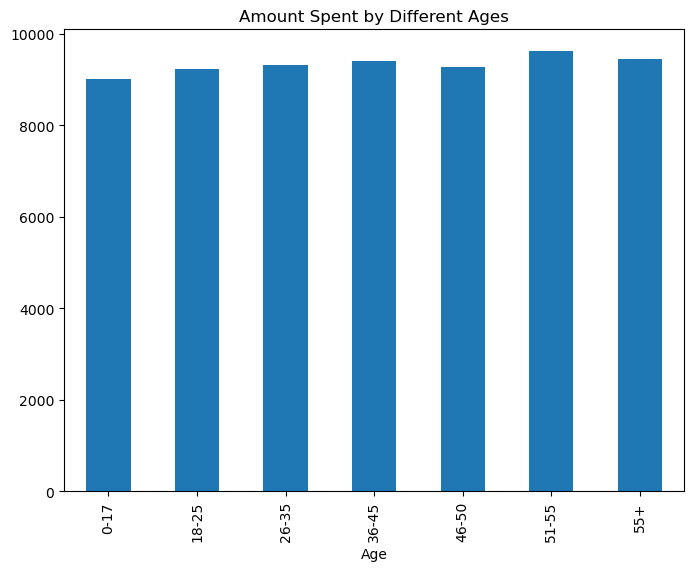

In [38]:
sales.groupby("Age").Purchase.mean().plot(kind= 'bar',figsize=(8,6),x = 'Age',y='Amount Spent by Age',title = "Amount Spent by Different Ages")

#### Pie Chart

<Axes: title={'center': 'Amount Spent by Different Ages'}, ylabel='Purchase'>

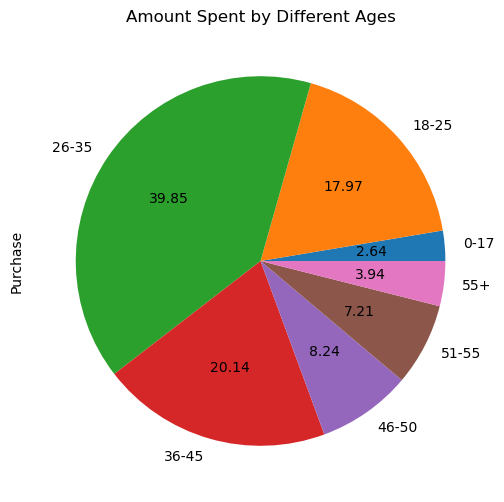

In [39]:
sales.groupby("Age").Purchase.sum().plot(kind= 'pie',figsize=(8,6),title = "Amount Spent by Different Ages",autopct = "%.2f")

## Multi Column Analysis

In [40]:
import seaborn as sns

### Age and Gender Analysis

<Axes: xlabel='Gender', ylabel='count'>

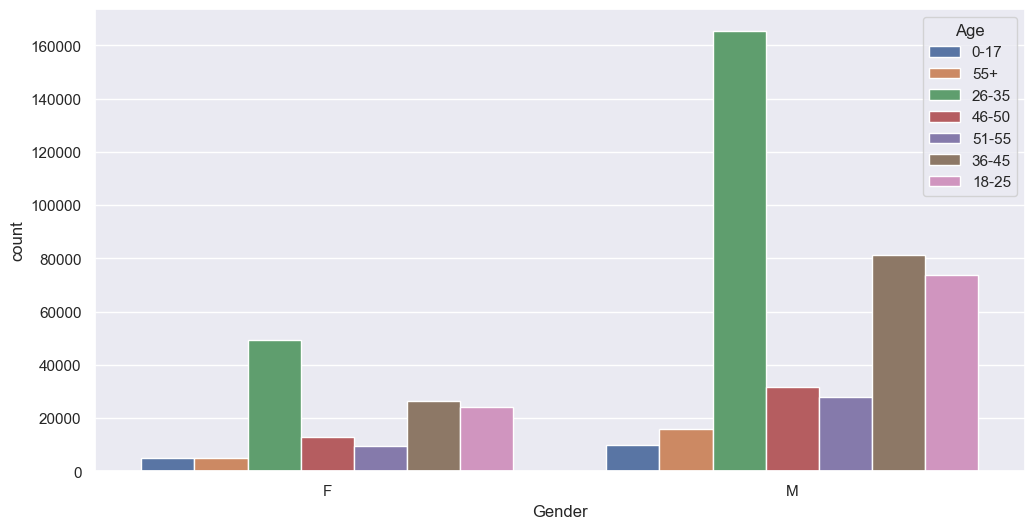

In [41]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x = 'Gender',hue = 'Age',data = sales)

### Marital Status and Gender Analysis

<Axes: xlabel='Gender', ylabel='count'>

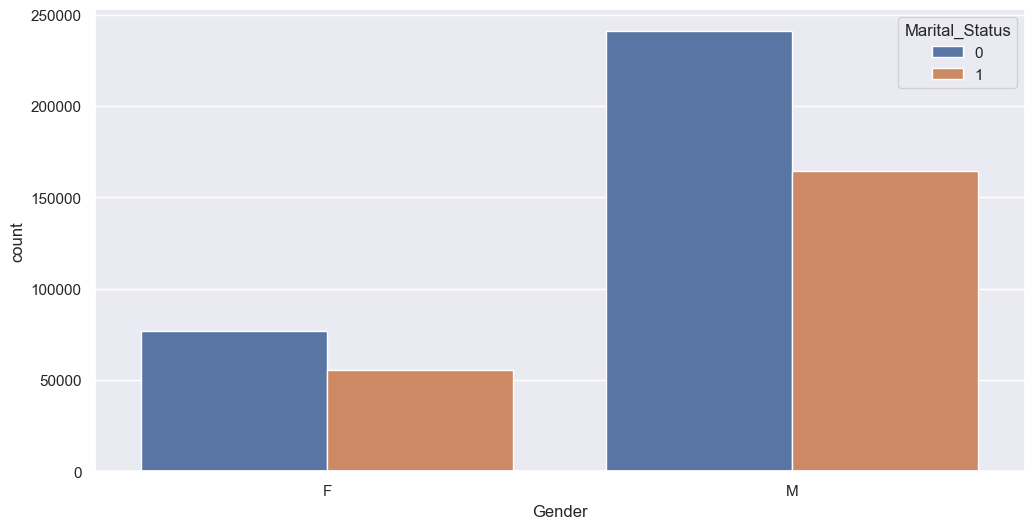

In [42]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x = 'Gender',hue = 'Marital_Status',data = sales)

<Axes: xlabel='City_Category', ylabel='count'>

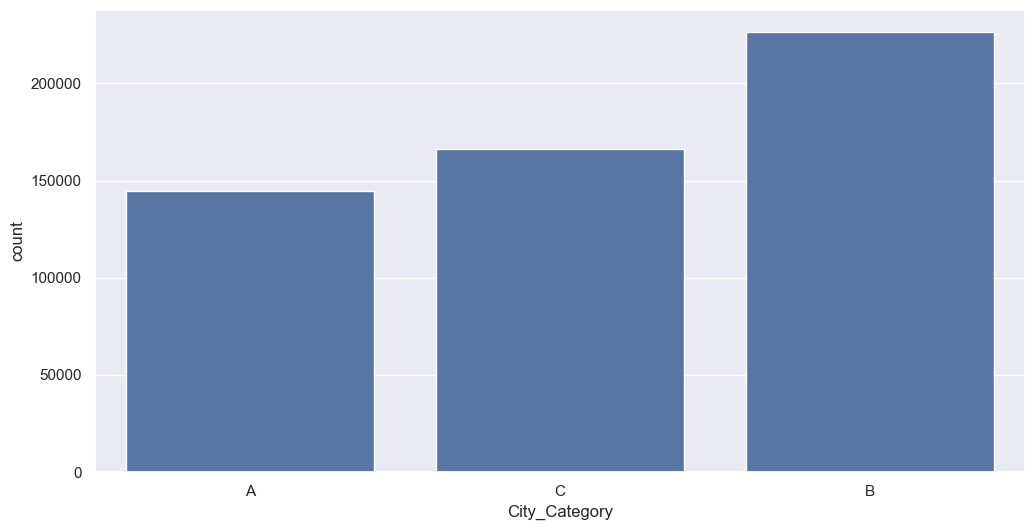

In [43]:
sns.countplot(x = sales.City_Category)

<Axes: >

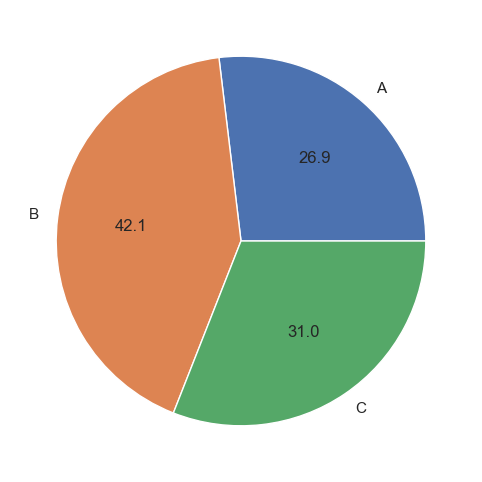

In [44]:
sales.groupby('City_Category').size().plot(kind = 'pie',autopct = "%.1f")

<Axes: xlabel='City_Category', ylabel='count'>

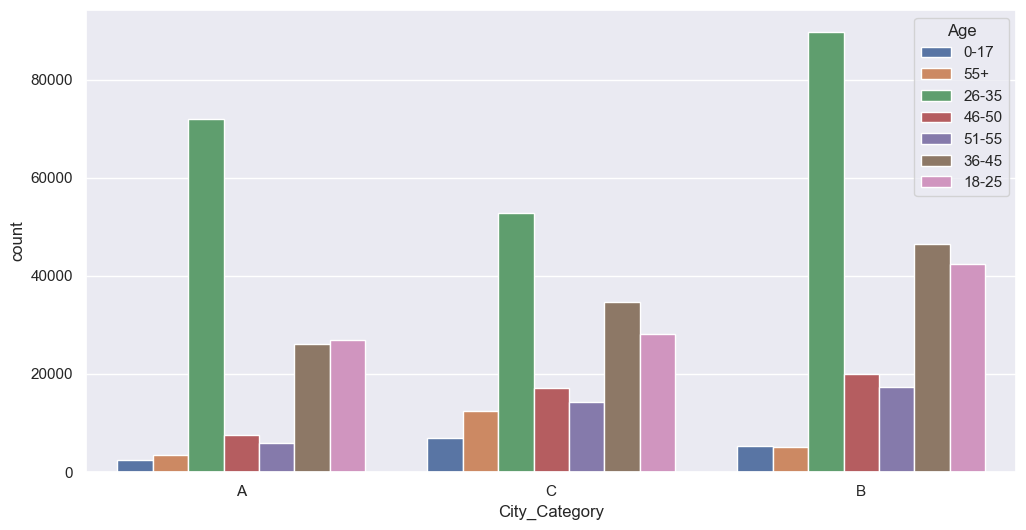

In [46]:
sns.countplot(x = "City_Category",hue = 'Age',data = sales)
#Age distribution over the cities

### How the martial status affects the purchase during the sales

In [47]:
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [56]:
purchase_by_maritalStatus = sales.groupby(["Gender",'Marital_Status']).Purchase.sum().reset_index()
purchase_by_maritalStatus.head()

,Gender,Marital_Status,Purchase
0,F,0,673815717
1,F,1,490808304
2,M,0,2292473783
3,M,1,1560570574


<Axes: xlabel='Gender', ylabel='Purchase'>

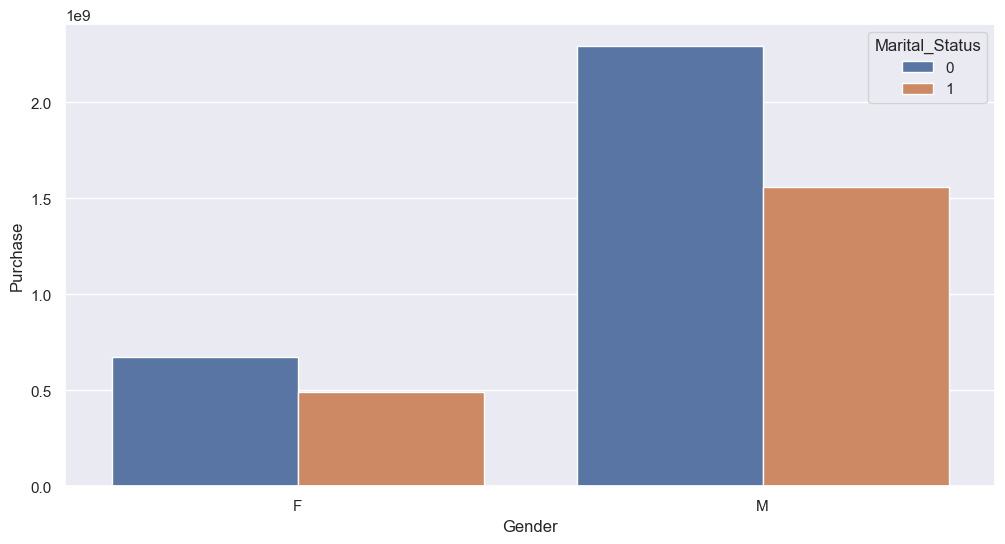

In [60]:
##now we can plot the bar graph
sns.barplot(x = "Gender",y = "Purchase",hue = 'Marital_Status',data = purchase_by_maritalStatus)

#### So from this we can understood that Unmarried Men will shop mostly and Married Women purchase is very less and overally men will purchase mostly according to the purchase amount

### Now how the City Category affects the purchase

In [67]:
purchase_by_city = sales.groupby(["City_Category"]).Purchase.sum().reset_index()
purchase_by_city

,City_Category,Purchase
0,A,1295668797
1,B,2083431612
2,C,1638567969


<Axes: ylabel='Purchase'>

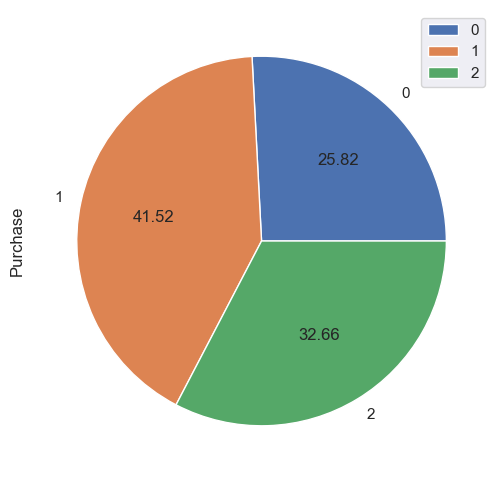

In [69]:
purchase_by_city.plot(kind = 'pie',autopct = "%.2f",x = "City_Category",y = "Purchase")

### We can Also Analyze by Bar Plots

<Axes: xlabel='City_Category'>

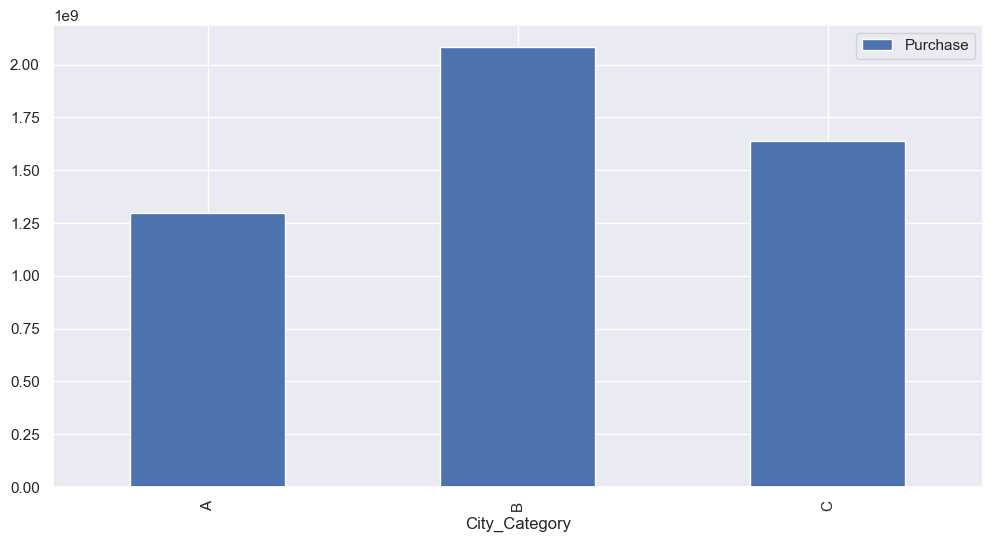

In [70]:
purchase_by_city.plot(kind = 'bar',x = "City_Category",y = "Purchase")